In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

2.4.1


In [5]:
mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력


60000


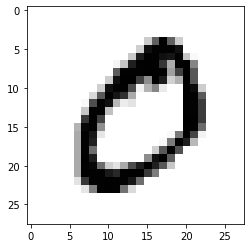

In [6]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()


In [7]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))


최소값: 0  최대값: 255


In [8]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))


최소값: 0.0  최대값: 1.0


In [9]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
#16채널 28사이즈
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
#32 알고리즘 복잡도
model.add(keras.layers.Dense(10, activation='softmax'))
#10개의 결과 0-9
print('Model에 추가된 Layer 개수: ', len(model.layers))


Model에 추가된 Layer 개수:  7


In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [11]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)
#마지막 1이 색상수 3이면 rgb

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#model.fit(x_train_reshaped, y_train, epochs=10)

In [13]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 4s - loss: 2.2994 - accuracy: 0.1227
test_loss: 2.2994332313537598 
test_accuracy: 0.12269999831914902


In [14]:
'''predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()'''

"predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. \npredicted_labels = np.argmax(predicted_result, axis=1)\n\nidx=0  #1번째 x_test를 살펴보자. \nprint('model.predict() 결과 : ', predicted_result[idx])\nprint('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])\nprint('실제 데이터의 라벨 : ', y_test[idx])\nplt.imshow(x_test[idx],cmap=plt.cm.binary)\nplt.show()"

In [15]:
'''import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()'''

'import random\nwrong_predict_list=[]\nfor i, _ in enumerate(predicted_labels):\n    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. \n    if predicted_labels[i] != y_test[i]:\n        wrong_predict_list.append(i)\n\n# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.\nsamples = random.choices(population=wrong_predict_list, k=5)\n\nfor n in samples:\n    print("예측확률분포: " + str(predicted_result[n]))\n    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))\n    plt.imshow(x_test[n], cmap=plt.cm.binary)\n    plt.show()'

In [16]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [17]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")


PIL 라이브러리 import 완료!


In [18]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(56,56)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

500  images to be resized.
500  images resized.
가위 이미지 resize 완료!


In [19]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

500  images to be resized.
500  images resized.


In [20]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

500  images to be resized.
500  images resized.


In [21]:
def load_data(img_path, number_of_data=1500):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=56
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1500 입니다.
x_train shape: (1500, 56, 56, 3)
y_train shape: (1500,)


In [22]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)



100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [23]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (1500, 56, 56, 3)
y_test shape: (1500,)


라벨:  0


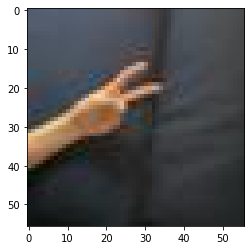

In [24]:

plt.imshow(x_test[0])
print('라벨: ', y_test[0])

라벨:  0


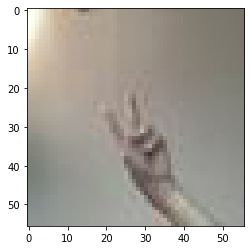

In [25]:

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [26]:
#print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
#print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

#x_train_reshaped=x_train_norm.reshape( -1, 56, 56, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
#x_test_reshaped=x_test_norm.reshape( -1, 56, 56, 1)
#마지막 1이 색상수 3이면 rgb
import random
import torch

class config:
    seed = 42
    device = "cuda:0"    
        
    lr = 1e-3
    epochs = 25
    batch_size = 32
    num_workers = 4
    train_5_folds = True

    
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  # type: ignore
    
seed_everything(config.seed)
tf.random.set_seed(1234)
print(tf.random.uniform([1]))  # generates 'A1'
print(tf.random.uniform([1]))  

tf.Tensor([0.5380393], shape=(1,), dtype=float32)
tf.Tensor([0.3253647], shape=(1,), dtype=float32)


In [33]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(56,56,3)))
model.add(keras.layers.MaxPool2D(3,3))

model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((3,3)))

model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 54, 54, 64)        1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 128)         147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)              

In [34]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))


model.fit(x_train_norm, y_train, epochs=10)

x_train shape: (1500, 56, 56, 3)
y_train shape: (1500,)
Epoch 1/10
47/47 [==============================] - 9s 96ms/step - loss: 1.1008 - accuracy: 0.3734
Epoch 2/10
47/47 [==============================] - 0s 9ms/step - loss: 0.9547 - accuracy: 0.5632
Epoch 3/10
47/47 [==============================] - 0s 9ms/step - loss: 0.6247 - accuracy: 0.7531
Epoch 4/10
47/47 [==============================] - 0s 9ms/step - loss: 0.4114 - accuracy: 0.8501
Epoch 5/10
47/47 [==============================] - 0s 9ms/step - loss: 0.2733 - accuracy: 0.9144
Epoch 6/10
47/47 [==============================] - 0s 9ms/step - loss: 0.2053 - accuracy: 0.9190
Epoch 7/10
47/47 [==============================] - 0s 9ms/step - loss: 0.1336 - accuracy: 0.9540
Epoch 8/10
47/47 [==============================] - 0s 9ms/step - loss: 0.1184 - accuracy: 0.9578
Epoch 9/10
47/47 [==============================] - 0s 9ms/step - loss: 0.1094 - accuracy: 0.9564
Epoch 10/10
47/47 [==============================] - 0s 9ms/s

In [35]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

47/47 - 0s - loss: 1.4198 - accuracy: 0.8707
test_loss: 1.4198006391525269 
test_accuracy: 0.8706666827201843
